# LOGISTIC REGRESSION CASE STUDY

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Description

# Model Building

In [6]:
#lets start buliding the model
from sklearn.linear_model import LogisticRegression

In [7]:
log_reg=LogisticRegression()  

In [8]:
#similar to what we do n Linear regression we split the data into 2 parts..
# And define the DV and IVs.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_final[["DaysSinceLastERVisit","Narcotics","Pain","TotalVisits",True]],df_final['PoorCare'],test_size=0.3,random_state=1)

C:\Users\singh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


NameError: name 'df_final' is not defined

In [165]:
#predict on train data
log_reg.fit(X_train,y_train)
pred_train=log_reg.predict(X_train)
pd.crosstab(y_train,pred_train)
#accuracy=(70+9)/(70+9+11+1)
#accuracy=86% on training data

col_0,0,1
PoorCare,,
0,70,1
1,11,9


In [166]:
pred=log_reg.predict(X_test)#to get the output as 1's and 0's
#by assuming t=0.5

In [167]:
#confusion matrix
pd.crosstab(y_test,pred)

col_0,0,1
PoorCare,,
0,23,4
1,6,7


In [168]:
TP=7.0
TN=23.0
FP=4.0
FN=6.0
#error on the test data
accuracy= float((TP+TN)/len(y_test))
error=float((FP+FN)/len(y_test))
print ("Accuracy is ")+ str(accuracy)
print ("error is ")+ str(error)
#print the coefficients
print "the coefficients are "+ str(log_reg.coef_)
print "the intercept is "+ str(log_reg.intercept_)
#we have got 75% accuracy, better than the baseline model
#similarly you can also calulate Sensitivity, Specificity and Precision

Accuracy is 0.75
error is 0.25
the coefficients are [[ -2.34777294e-03   1.32117981e-01  -3.96613720e-02   5.94438370e-02
    2.74713754e+00]]
the intercept is [-1.52482037]


In [169]:
#Also comparing the accuracy of Train 86% and test 75% , it looks like we have silghtly overfit..
# we can try to exclude some variables to get a better fit and reduce complexity of the model

In [170]:
#so fro above we get the equation of the Logistic regression
#
#P(y=1)= 1/ 1+e^(-1.52 -0.0023*DaysSinceLastERVisit+0.132*Narcotics-... and so on.)
#INTERPRETATION OF THE MODEL-----------------------------------------------------
#This means that icreasing DaysSinceLastERVisit,Pain (negative coefficient) takes you towards P(y=0) or PoorCare(0). 
#This maskes sense as well
#Similarly higher value of Narcotics & TotalVisits would means you are more likely to have 
#reveived Poor Care. This too makes sense( read the variable description at the begining)

In [171]:
pred1=log_reg.predict_proba(X_test)# to get probabilities instead of classes

# ROC CURVE

(-0.05, 1.05)

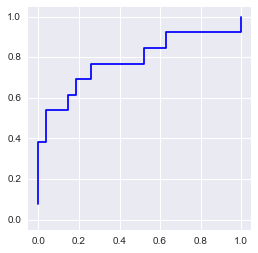

In [172]:
#lets us look at ROC curve
#dont worry about the codes fro ROC curve.. You dont have to remember it.. Just know its application
#to read more about ROC curve refer---->
# http://blog.yhat.com/posts/roc-curves.html or http://www.dataschool.io/roc-curves-and-auc-explained/
fpr, tpr, threshold= metrics.roc_curve(y_test, pred1[:,1]) #pass the actual test DV and 
#predicted probability (only P(y)=1)
#**********DRAW ROC CURVE**************
plt.plot(fpr, tpr, label='ROC curve', color='b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

In [173]:
AUC= metrics.auc(fpr,tpr) # to get the area under the Curve
print AUC #78% which is good. this means model is covering 78% of the datapoints well. Best value is 1
#worst is 0

0.783475783476


In [174]:
from sklearn import metrics

In [175]:
#CONVERT THE PROBABILITITS TO 1'S AND 0'S APPLYING OUT OWN THRESHOLD
#HERE 0.40
x=[]
for i in range(len(pred1[:,1])):
    if (pred1[:,1][i]>=0.4):
        x.append(1)
    else:
        x.append(0)
x=np.array(x)
pd.crosstab(y_test,x)

col_0,0,1
PoorCare,,
0,23,4
1,5,8


In [176]:
#output 2
TP=8.0
TN=23.0
FP=4.0
FN=5.0
#error on the test data
accuracy= float((TP+TN)/len(y_test))
error=float((FP+FN)/len(y_test))
print accuracy
print error
#slightly better than before
#similarly you can also calulate Sensitivity, Specificity and Precision

0.775
0.225


In [177]:
#lets see the P values to verify if we have used all Good variables

In [178]:
import statsmodels.discrete.discrete_model as sm
from statsmodels.api import add_constant
X2 = add_constant(X_train)

In [179]:
logit = sm.Logit(y_train, X2)

In [180]:
result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.370628
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               PoorCare   No. Observations:                   91
Model:                          Logit   Df Residuals:                       85
Method:                           MLE   Df Model:                            5
Date:                Mon, 11 Dec 2017   Pseudo R-squ.:                  0.2962
Time:                        00:36:26   Log-Likelihood:                -33.727
converged:                       True   LL-Null:                       -47.923
                                        LLR p-value:                 3.050e-05
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                   -1.5322      0.805     -1.904      0.057        -3.109     0.045

In [181]:
# we see from abve that Pain and Total Visits are not imprtant pain 14% and Total Visits 9.6%
#let lets exclude them and recheck the model

In [182]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_final[["DaysSinceLastERVisit","Narcotics",True]],df_final['PoorCare'],test_size=0.3,random_state=1)

In [183]:
log_reg=LogisticRegression(C = 1e9)
log_reg.fit(X_train,y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [184]:
#predict on train data
pred_train=log_reg.predict(X_train)
pd.crosstab(y_train,pred_train)
#accuracy=(70+9)/(70+9+11+1)
#accuracy=86% on training data
#similarly you can also calulate Sensitivity, Specificity and Precision

col_0,0,1
PoorCare,,
0,70,1
1,11,9


In [185]:
#predict on test
pred=log_reg.predict(X_test)#to get the output as 1's and 0's
#by assuming t=0.5
#confusion matrix
pd.crosstab(y_test,pred)
#test data accuracy= 27+5=32
print "accuracy is "+ str(32.0/40) #80% better than previous result and very close to train data accuracy (86%).
#this is random variation.
#hence overfitting has been removed. 

accuracy is 0.8


In [186]:
#so final model will have only DaysSinceLastERVisit","Narcotics" & 
#StartedOnCombination(dummy of this) as the INDEPENDENT VARIABLES

In [94]:
#HOPE THIS CASE STUDY HELPED YOU. THIS IS HOW TO PROCEED WITH ANY DATA.. ONE STEP AT A TIME.
# NURTURING YOUR DATA SCIECNE JOURNEY AND HONING YOUR SKILLS.
# MAIL AT BANGALOREDATASCIENCEACADEMY@GMAIL.COM FOR MORE SUCH CASE STUDIES